# Case study on Supervised Learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [ ]:
#Importing relevant libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset

In [3]:
data= pd.read_excel(r'G:\my trials\Casestudy\iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Performing general analysis

In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

# Preprocessing the data 

##### Filling missing values

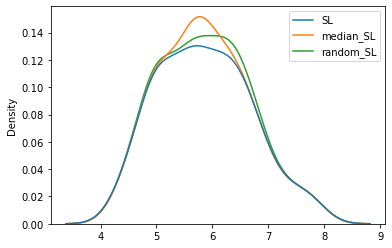

In [10]:
# random value approach and median value approch for filling null values
random_values_SL = data['SL'].dropna().sample(data['SL'].isnull().sum())
random_values_SL.index = data[data['SL'].isnull()].index
data['random_SL'] = data['SL'].fillna(random_values_SL)
data['median_SL'] = data['SL'].fillna(data['SL'].median())
sns.kdeplot(data=data[['SL', 'median_SL','random_SL']])
plt.show()

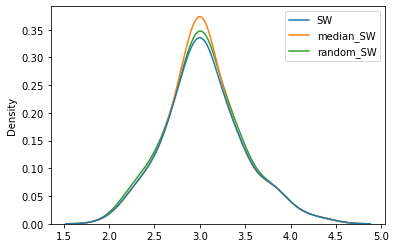

In [11]:
# random value approach and median value approch for filling null values
random_values_SW = data['SW'].dropna().sample(data['SW'].isnull().sum())
random_values_SW.index = data[data['SW'].isnull()].index
data['random_SW'] = data['SW'].fillna(random_values_SW)
data['median_SW'] = data['SW'].fillna(data['SW'].median())
sns.kdeplot(data=data[['SW', 'median_SW','random_SW']])
plt.show()

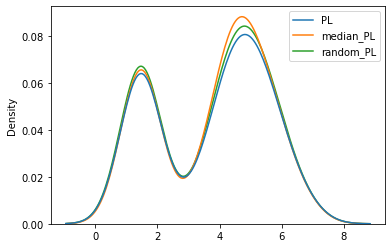

In [12]:
# random value approach and median value approch for filling null values
random_values_PL = data['PL'].dropna().sample(data['PL'].isnull().sum())
random_values_PL.index = data[data['PL'].isnull()].index
data['random_PL'] = data['PL'].fillna(random_values_PL)
data['median_PL'] = data['PL'].fillna(data['PL'].median())
sns.kdeplot(data=data[['PL', 'median_PL','random_PL']])
plt.show()

In [13]:
# Filling values
data['SL'].fillna(random_values_SL, inplace=True)
data['SW'].fillna(random_values_SW, inplace=True)
data['PL'].fillna(random_values_PL, inplace=True)

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
random_SL         0
median_SL         0
random_SW         0
median_SW         0
random_PL         0
median_PL         0
dtype: int64

##### Finding outliers

Text(0.5, 1.0, 'Box plot of PW')

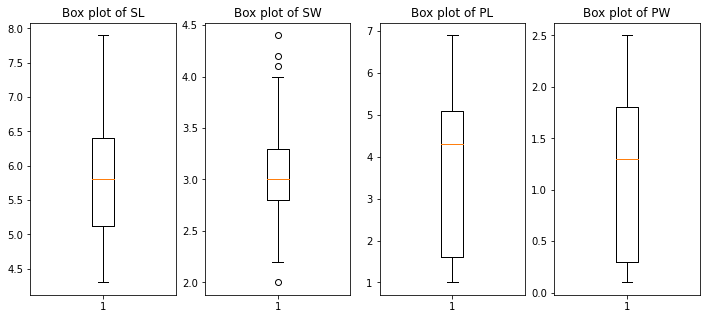

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
plt.boxplot(data['SL'])
plt.title('Box plot of SL')
plt.subplot(1,4,2)
plt.boxplot(data['SW'])
plt.title('Box plot of SW')
plt.subplot(1,4,3)
plt.boxplot(data['PL'])
plt.title('Box plot of PL')
plt.subplot(1,4,4)
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

In [16]:
# Outlier detection using IQR method in the column 'SW' 
Q1=np.percentile(data['SW'], 25, interpolation='midpoint')
Q2=np.percentile(data['SW'], 50, interpolation='midpoint')
Q3=np.percentile(data['SW'], 75, interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR


In [17]:
outlier=[]
for x in data['SW']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [18]:
ind1=data['SW']>up_lim
index_remove=data.loc[ind1].index
index_remove

Int64Index([15, 32, 33], dtype='int64')

In [19]:
data.drop(index=index_remove, inplace=True)
data.shape

(147, 11)

##### One hot Encoding

In [20]:
data=pd.get_dummies(data)
data.head()

,SL,SW,PL,PW,random_SL,median_SL,random_SW,median_SW,random_PL,median_PL,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,5.1,5.1,3.5,3.5,1.4,1.4,1,0,0
1,4.9,3.0,1.4,0.2,4.9,4.9,3.0,3.0,1.4,1.4,1,0,0
2,6.8,3.2,1.3,0.2,6.8,5.8,3.2,3.2,1.3,1.3,1,0,0
3,4.6,3.1,1.5,0.2,4.6,4.6,3.1,3.1,1.5,1.5,1,0,0
4,5.0,3.6,1.4,0.2,5.0,5.0,3.6,3.6,1.4,1.4,1,0,0


In [21]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'random_SL', 'median_SL', 'random_SW',
       'median_SW', 'random_PL', 'median_PL', 'Classification_Iris-setosa',
       'Classification_Iris-versicolor', 'Classification_Iris-virginica'],
      dtype='object')

In [45]:
# creating a linear regression model
y=data[['Classification_Iris-setosa','Classification_Iris-versicolor', 'Classification_Iris-virginica']]
X=data.drop(['Classification_Iris-setosa', 'Classification_Iris-versicolor', 'Classification_Iris-virginica'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
from sklearn import linear_model
lr= linear_model.LinearRegression()
model= lr.fit(X_train, y_train)
predictions= model.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
print('MSE is:', mean_squared_error(y_test, predictions))
print('Rsquared value is:', r2_score(y_test, predictions))


MSE is: 0.12174885039138011
Rsquared value is: 0.4443569286333852


##### Min max scaling

In [23]:
from sklearn import preprocessing

In [24]:
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)

In [27]:
# creating a linear regression model after min max scaling
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
predictions= model.predict(X_test)
print('MSE is:', mean_squared_error(y_test, predictions))
print('Rsquared value is:', r2_score(y_test, predictions))

MSE is: 0.12174885039138006
Rsquared value is: 0.44435692863338555


##### standard scaling

In [28]:
standardisation= preprocessing.StandardScaler()
X=standardisation.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
predictions= model.predict(X_test)
print('MSE is:',mean_squared_error(y_test, predictions))
print('Rsquared value is:', r2_score(y_test, predictions))


MSE is: 0.12174885039138007
Rsquared value is: 0.44435692863338533


##### Normalization

In [29]:
X=preprocessing.normalize(X)
X=pd.DataFrame(X)

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
predictions= model.predict(X_test)
print('MSE is:',mean_squared_error(y_test, predictions))
print('Rsquared value is:', r2_score(y_test, predictions))

MSE is: 0.12126739357141403
Rsquared value is: 0.44507645429417647


# Supervised Learning Models

##### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
acc_values= []
neighbors= np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

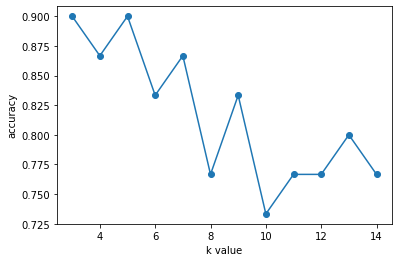

In [32]:
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [33]:
from sklearn.neighbors import KNeighborsClassifier
acc_values= []
neighbors= np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [34]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='micro'))
print("Recall is:", recall_score(y_test, y_pred,average='micro'))
print("f1 score is:", f1_score(y_test, y_pred,average='micro'))

Accuracy is: 0.9
Precision is: 0.9
Recall is: 0.9
f1 score is: 0.9


##### Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred= dt_model.predict(X_test)

In [36]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='micro'))
print("Recall is:", recall_score(y_test, y_pred,average='micro'))
print("f1 score is:", f1_score(y_test, y_pred,average='micro'))

Accuracy is: 0.8333333333333334
Precision is: 0.8333333333333334
Recall is: 0.8333333333333334
f1 score is: 0.8333333333333334


#### Random forest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [38]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='micro'))
print("Recall is:", recall_score(y_test, y_pred,average='micro'))
print("f1 score is:", f1_score(y_test, y_pred,average='micro'))

Accuracy is: 0.9
Precision is: 0.9
Recall is: 0.9
f1 score is: 0.9
